# --- Load the Dataset ---

In the following session, please complete:

Load the dataset as a Pandas Dataframe (Dataset: Please download [data.csv](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data))

Our objective is building and evaluating tree-based binary classification models to predict the diagonosis result ("M" or "B") based on the measurements (**dependent variable is "Diagnosis"**)

In [3]:

import pandas as pd
data = pd.read_csv('data.csv')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# --- Necessary Data Exploration and Preparation ---

In the following session, please complete:

1.   Calculate **descriptive statistics** (mean, standard deviation, etc.) for each column (excluding id column).
2.   Create **visualizations** (scatter plots, box plots, histograms) to visualize some key features (e.g., histograms, scatter plots) to gain insights into the data.
3.   **Feature Scaling** (Standardize or normalize the features using sklearn.preprocessing.StandardScaler() or sklearn.preprocessing.MinMaxScaler(). Explain why this step is important.)
4.   Check the class distribution (number of **M** vs. **B** cases). Try resampling technique if the class distribution is highly imblanced(any ratio worst than 3:7).
5.   **Randomly Splitting** the data into training, testing set (80% training, 20% testing)

It's your choice to decide what to do or how to do, but please **include a short sentence to explain**.

In [4]:
#calculate descriptive statistics of data except id column
data_description = data.drop(['id', 'Unnamed: 32'], axis=1).describe()
data_description


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:

# Check data types and missing values
data_info = pd.DataFrame(data.dtypes, columns=['Data Type'])
data_info['NA Count'] = data.isnull().sum()
data_info


,Data Type,NA Count
id,int64,0
diagnosis,object,0
radius_mean,float64,0
texture_mean,float64,0
perimeter_mean,float64,0
area_mean,float64,0
smoothness_mean,float64,0
compactness_mean,float64,0
concavity_mean,float64,0
concave points_mean,float64,0


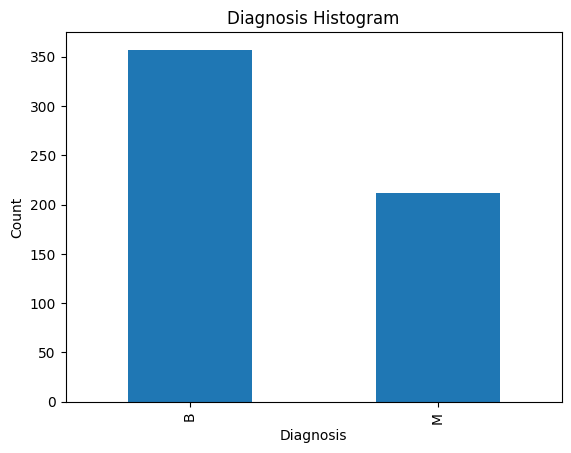

In [6]:
# prompt: Please give me a histogram of every unique entry in diagnosis

import matplotlib.pyplot as plt
data['diagnosis'].value_counts().plot(kind='bar', title='Diagnosis Histogram')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

#B is benign and M is malignant or cancerous

**It is important to normalize the data before going into ML or EDA. when doing a histogram of every column based on diagnosis, the only visable data entries are area because the raw number is in the hundreds, when other measurements are lower magnitudes such as small decimals. To give each measurement equal weight in our analyses it is imprtant to put them on the same scale through normalization.**


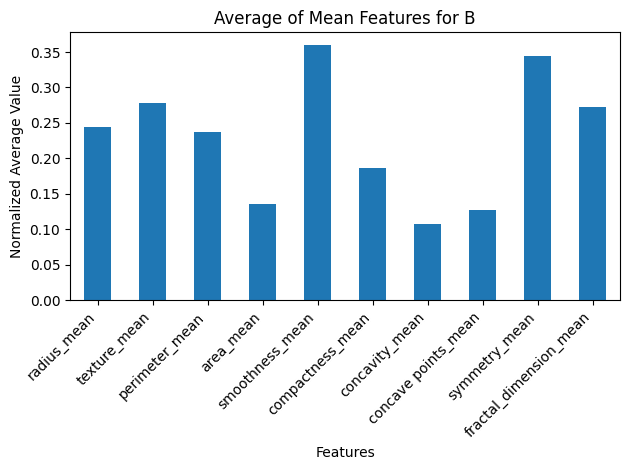

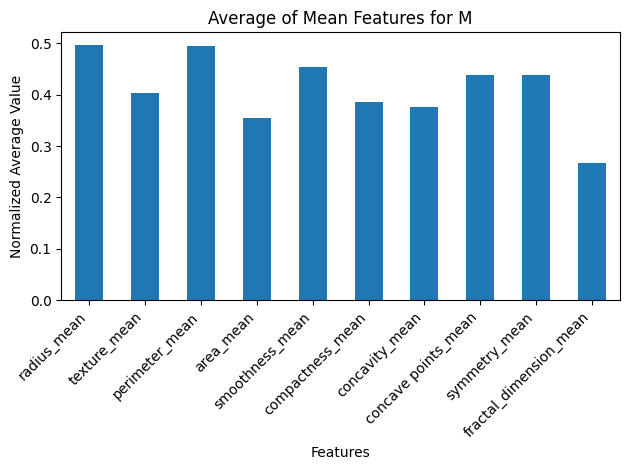

In [7]:
# prompt: Can you group the data based on if they are M or B based on the diagnosis column, then create a histogram of average values for columns ending in "_mean" for B and then another histogram for M. Please normalize the columns

from sklearn.preprocessing import MinMaxScaler

# Group data by diagnosis
grouped_data = data.groupby('diagnosis')

# Normalize the columns ending in "_mean"
scaler = MinMaxScaler()
mean_cols = [col for col in data.columns if col.endswith('_mean')]
data[mean_cols] = scaler.fit_transform(data[mean_cols])

# Create histograms for B and M
for diagnosis, group_df in grouped_data:
    group_df[mean_cols].mean().plot(kind='bar', title=f'Average of Mean Features for {diagnosis}')
    plt.xlabel('Features')
    plt.ylabel('Normalized Average Value')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()


**This EDA graphing using group by shows how the average measurements change based on diagnosis result.It looks like malignant tumors are bigger and less smooth**

In [8]:
# prompt: Please standardize all columns in the data
# Select numerical features for standardization
numerical_features = data.select_dtypes(include=['number']).columns
numerical_features = numerical_features.drop(['id', 'Unnamed: 32'])

# Standardize the numerical features
scaler = MinMaxScaler()  # Or StandardScaler() if you prefer standardization
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the standardized data (optional)
print(data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M     0.521037      0.022658        0.545989   0.363733   
1    842517         M     0.643144      0.272574        0.615783   0.501591   
2  84300903         M     0.601496      0.390260        0.595743   0.449417   
3  84348301         M     0.210090      0.360839        0.233501   0.102906   
4  84358402         M     0.629893      0.156578        0.630986   0.489290   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.289880          0.181768        0.203608             0.348757   
2         0.514309          0.431017        0.462512             0.635686   
3         0.811321          0.811361        0.565604             0.522863   
4         0.430351          0.347893        0.463918             0.518390   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [9]:
# prompt: Check the class distribution (number of M vs. B cases). Try resampling technique if the class distribution is highly imblanced(any ratio worst than 3:7).
# Randomly Splitting the data into training, testing set (80% training, 20% testing)

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Check class distribution
class_counts = data['diagnosis'].value_counts()
print(class_counts)

# Calculate the ratio of the classes
ratio = class_counts['B'] / class_counts['M']
print(f"The ratio of B to M is: {ratio:.2f}")

# If the class distribution is imbalanced (worst than 3:7)
if ratio > 1.43 or ratio < 0.7:
  print("Class distribution is imbalanced. Applying Random Over Sampling")
  # Separate features and target variable
  X = data.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)
  y = data['diagnosis']

  # Initialize and apply the random oversampler
  oversampler = RandomOverSampler(random_state=42)
  X_resampled, y_resampled = oversampler.fit_resample(X, y)

  # Create a new DataFrame with the resampled data
  data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
  data_resampled['diagnosis'] = y_resampled

  # Split the data into training and testing sets (80% training, 20% testing)
  X_train, X_test, y_train, y_test = train_test_split(
      data_resampled.drop('diagnosis', axis=1), data_resampled['diagnosis'], test_size=0.2, random_state=42
  )

else:
  print("Class distribution is balanced enough. No resampling needed.")
  # Split the data into training and testing sets (80% training, 20% testing)
  X_train, X_test, y_train, y_test = train_test_split(
      data.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1), data['diagnosis'], test_size=0.2, random_state=42
  )

print("Data Splitting done")


diagnosis
B    357
M    212
Name: count, dtype: int64
The ratio of B to M is: 1.68
Class distribution is imbalanced. Applying Random Over Sampling
Data Splitting done


**The ratio of each diagnosis are very uneven, we must use resampling to avoid training on too many benign tumors. By pairing the coding for both of these steps we ensure that the data is resampled before the splitting process.**

# --- Tree-based Model Training and Evaluation with cross-validation ---

In the following session, using the training, please create models using algorithms (decision tree, random forest):
\\

1.   **Decision Tree** using [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
  * Use Gini impurity as the criterion.
  * **Train** the model on the training data.
  * **Make predictions** on the testing data.
      * Calculate the accuracy of the model on the testing data using *sklearn.metrics.accuracy_score()*.
      * Generate a classification report using *sklearn.metrics.classification_report()* to assess precision, recall, and F1-score.
      * Create a confusion matrix using *sklearn.metrics.confusion_matrix()* to visualize the model's performance.
      * Provide a brief interpretation of the results.

   * Use **sklearn.tree.export_graphviz()** and **graphviz** to visualize the decision tree.
      * Alternatively, use **sklearn.tree.plot_tree()** for a direct plot within Colab or Jupyter notebooks.

2.   **Random Forest** using [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
  * Use Gini impurity as the criterion.
  * **Train** the model on the training data.
      * Calculate the accuracy of the model on the **testing data** using *sklearn.metrics.accuracy_score()*.
      * Generate a classification report using *sklearn.metrics.classification_report()* to assess precision, recall, and F1-score.
      * Create a confusion matrix using *sklearn.metrics.confusion_matrix()* to visualize the model's performance.
      * Provide a brief interpretation of the results.
  * **Hyperparameter Tuning** (Experiment with the following hyperparameters to improve model performance):
      * **n_estimators**: Number of trees in the forest.
      * **max_depth**: Maximum depth of the trees.
      * **min_samples_split**: Minimum number of samples required to split an internal node.
      * **min_samples_leaf**: Minimum number of samples required to be at a leaf node.
      * Use *sklearn.model_selection.GridSearchCV* or *sklearn.model_selection.RandomizedSearchCV* to find the best combination of hyperparameters.
  * **Retrain** the model with the **optimal hyperparameters**.
      * Evaluate the tuned model using the same metrics, and compare the performance of the initial model and the tuned model.
      * **Explain** the effect of each hyperparameter on the model's performance.
   * Use **sklearn.tree.export_graphviz()** and **graphviz** to visualize the decision tree.
      * Alternatively, use **sklearn.tree.plot_tree()** for a direct plot within Colab or Jupyter notebooks.




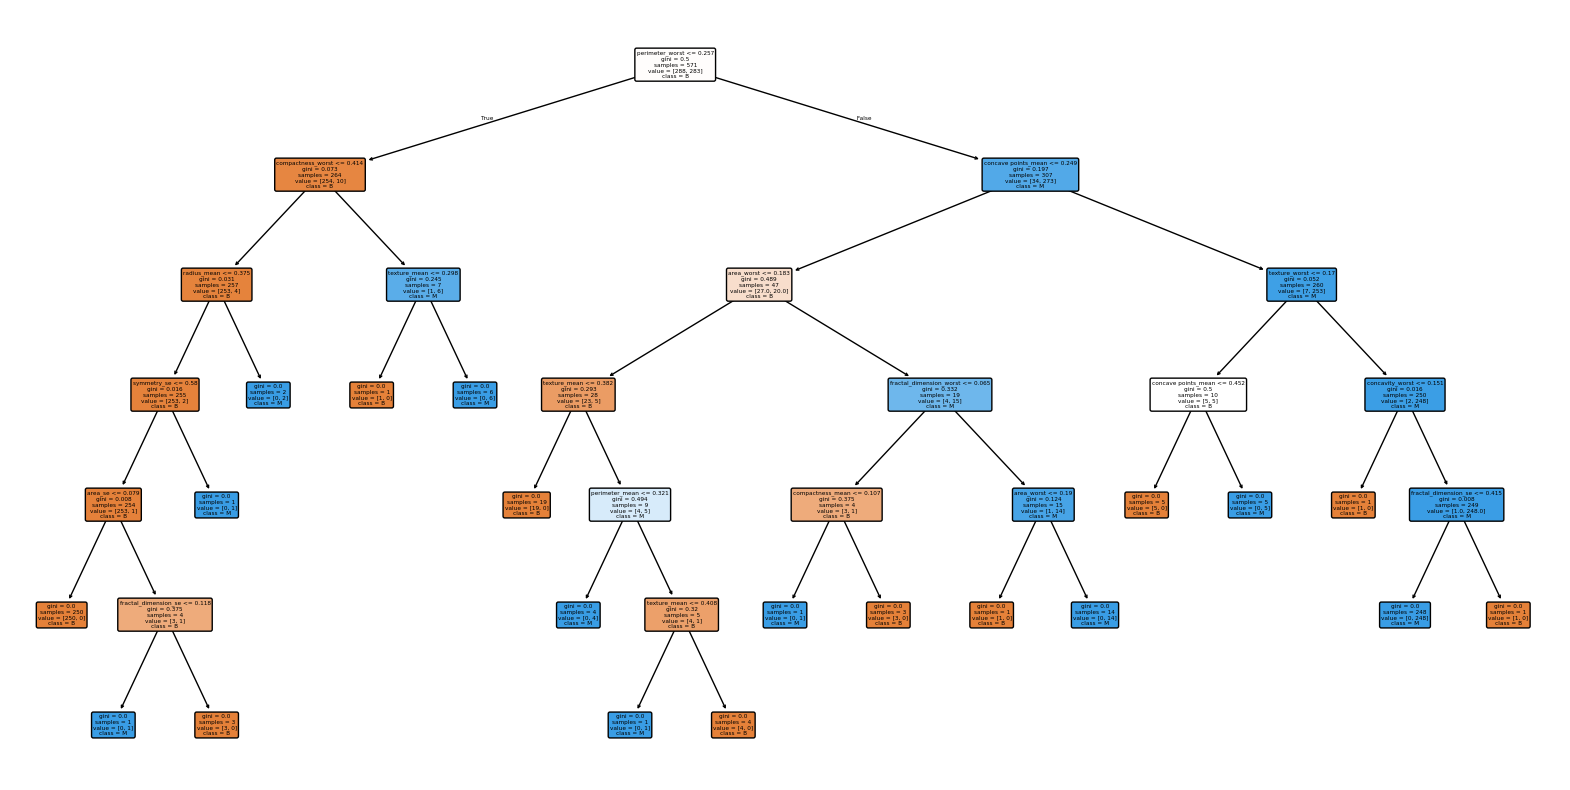

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        69
           M       0.96      0.96      0.96        74

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



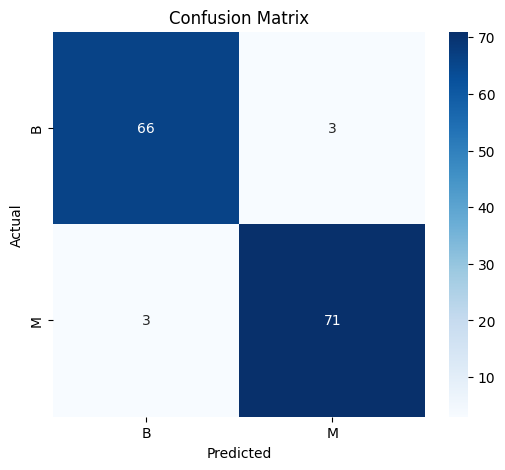

In [32]:
# prompt: Decision Tree using Decision Tree
# Use Gini impurity as the criterion.
# Train the model on the training data.
# Make predictions on the testing data.
# Calculate the accuracy of the model on the testing data using sklearn.metrics.accuracy_score().
# Generate a classification report using sklearn.metrics.classification_report() to assess precision, recall, and F1-score. When making the decision tree please make sure each end leaf has at least 10 data pointsin it
# Create a confusion matrix using sklearn.metrics.confusion_matrix() to visualize the model's performance.
# Please show the decision tree too

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf = clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['B', 'M'], rounded=True)
plt.show()

# Predict on the test set
y_pred = clf.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**This is definietly over fitting. Having end leaves with 1 case on it is to small to generalize to the population. I think for hyper parameter tuning I would like to reduce the amount of cases on the end leaves.**

Model Accuracy: 0.9580
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        69
           M       0.96      0.96      0.96        74

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



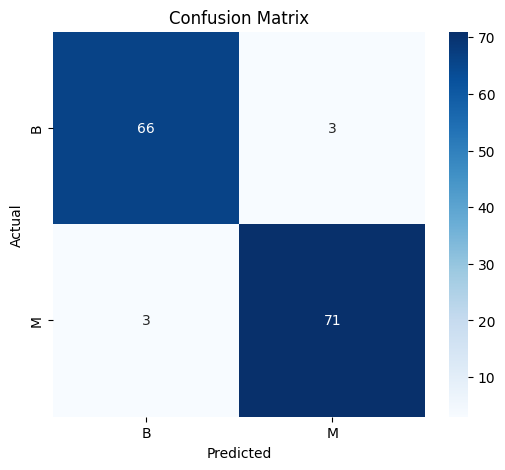

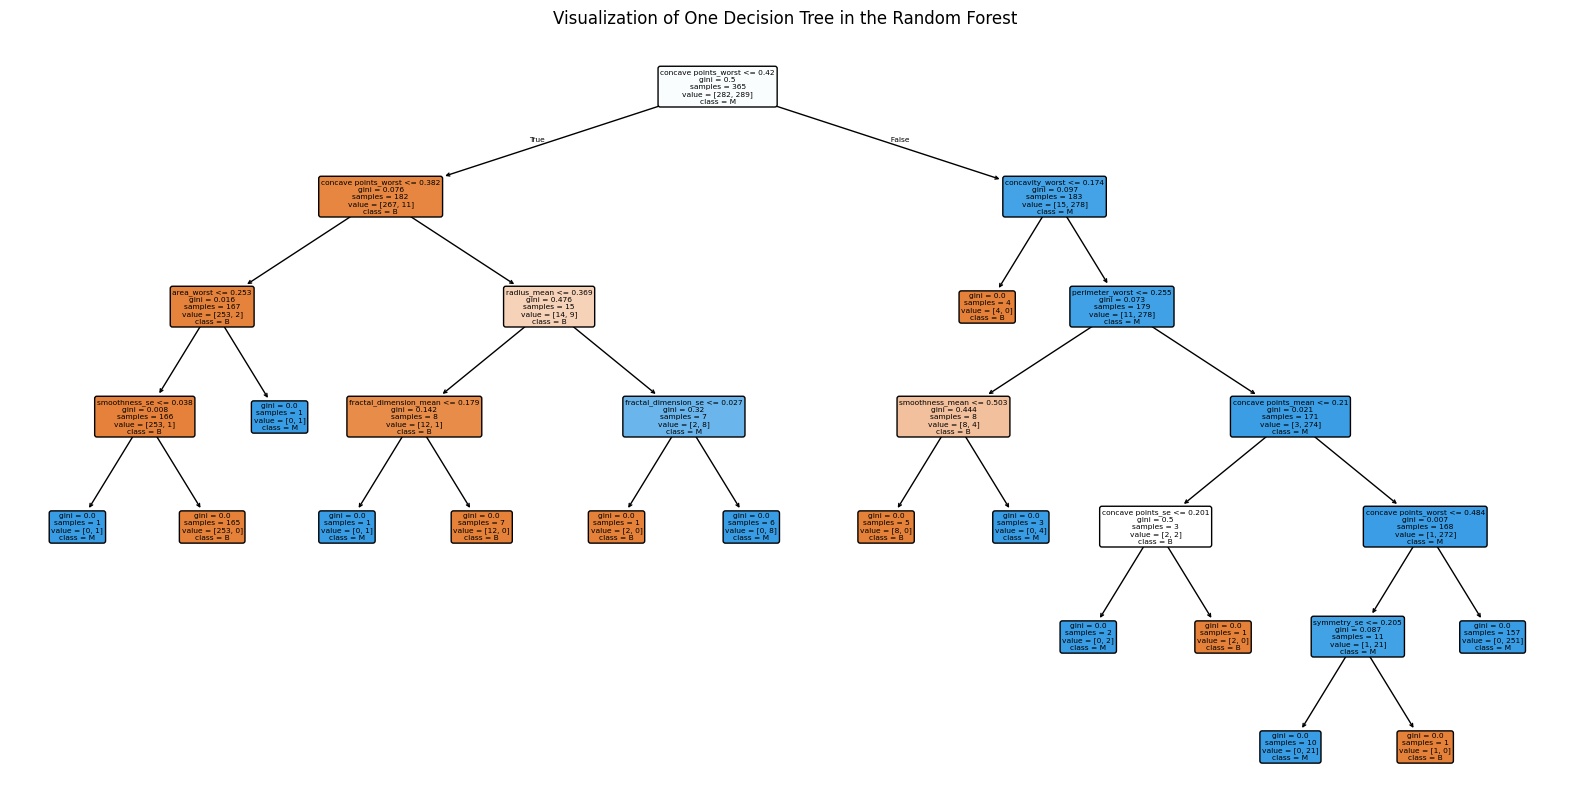

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(criterion='gini', random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize one of the decision trees from the Random Forest
plt.figure(figsize=(20,10))
plot_tree(rf_clf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['B', 'M'], rounded=True)
plt.title("Visualization of One Decision Tree in the Random Forest")
plt.show()

# Brief Interpretation:
# - High accuracy suggests good classification performance.
# - The classification report provides precision, recall, and F1-score.
# - The confusion matrix helps assess misclassifications.
# - The decision tree visualization gives insight into one of the trees in the forest.


**Similar to the other one this has too many leaves In my opinion. Some of the end leaves are just seperating individual cases.**

**The code below is with the randomized search for the best hyper parameters. It has a recall, f-1 score, and precision score a little lower than the initial model, but I think it's less over fit. I also tested them seperately but they all converged on the same values that are achieved from this ensemble method. The models always ends up with a model that has the same confusion matrix.**

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
Model Accuracy: 0.9510
Classification Report:
              precision    recall  f1-score   support

           B       0.94      0.96      0.95        69
           M       0.96      0.95      0.95        74

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



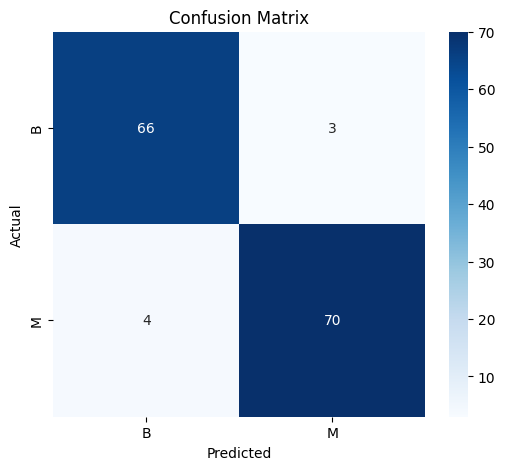

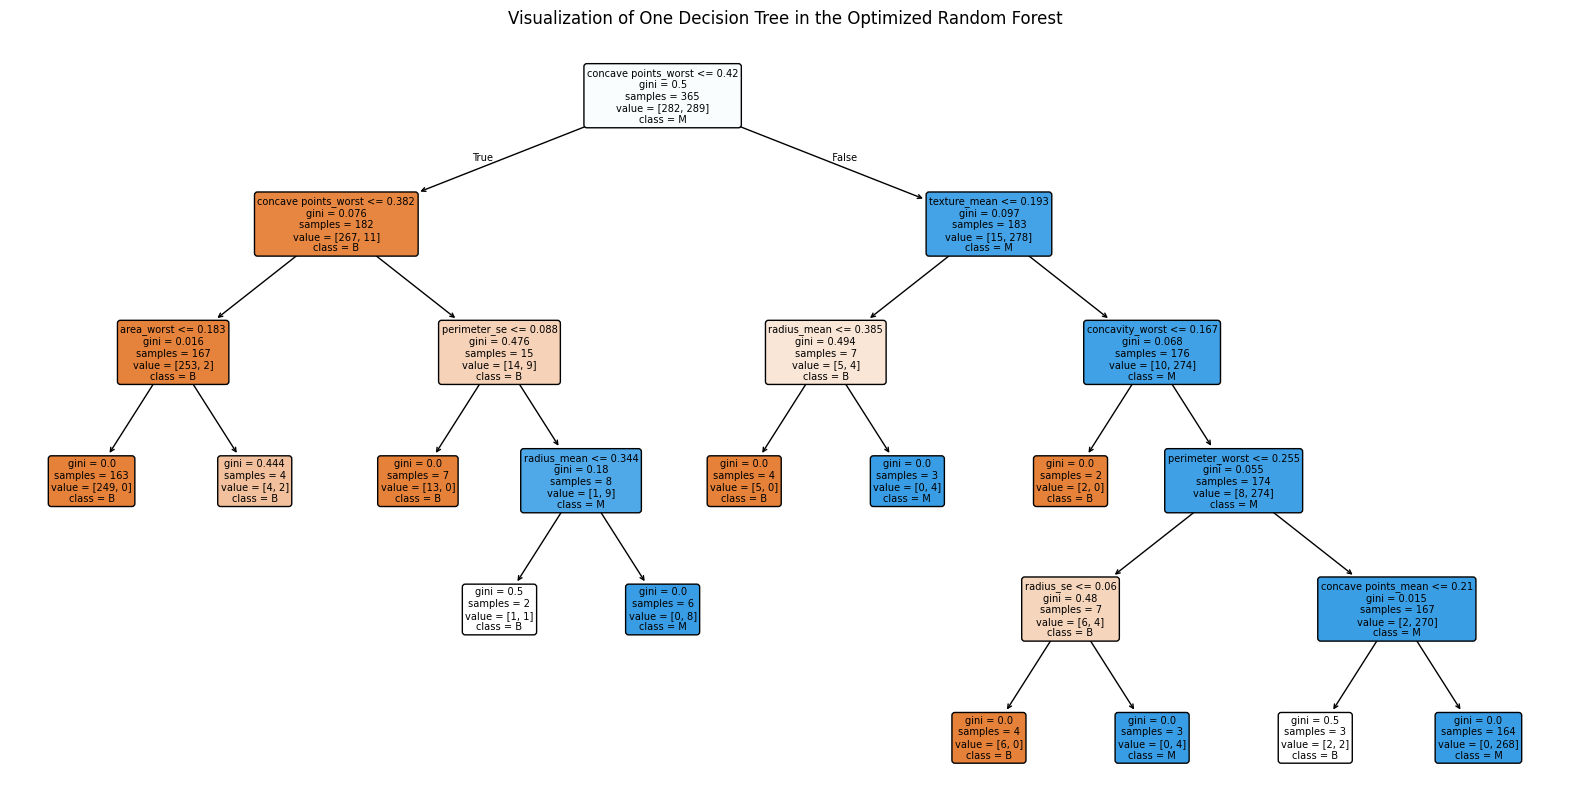

In [35]:
## Randomized search for ALL 4 parameters

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 2, 3,4, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10, 20, 30],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 8, 16, 32]  # Minimum number of samples at a leaf node
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(criterion='gini', random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
rf_random = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model on the training data
rf_random.fit(X_train, y_train)

# Get the best parameters
best_params = rf_random.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the best model with optimized hyperparameters
best_rf_clf = rf_random.best_estimator_

# Predict oaccuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize one of the decision trees from the best Random Forest model
plt.figure(figsize=(20,10))
plot_tree(best_rf_clf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['B', 'M'], rounded=True)
plt.title("Visualization of One Decision Tree in the Optimized Random Forest")
plt.show()n the test set
y_pred = best_rf_clf.predict(X_test)

# Calculate accuracy
accuracy =


***This is the best model I could make below by the f1 score. But this is the same as the original one made based on measurement data***



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=20. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Hyperparameters: {'n_estimators': 100}
Model Accuracy: 0.9580
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        69
           M       0.96      0.96      0.96        74

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



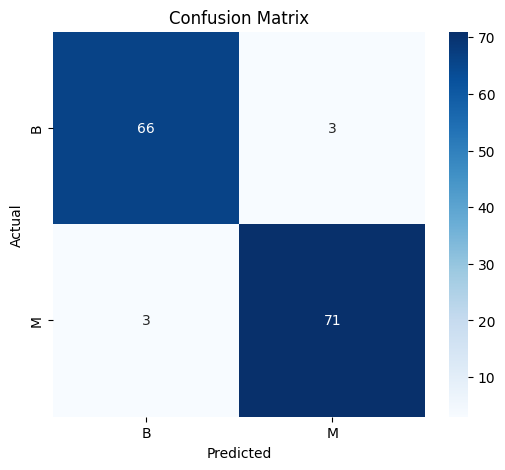

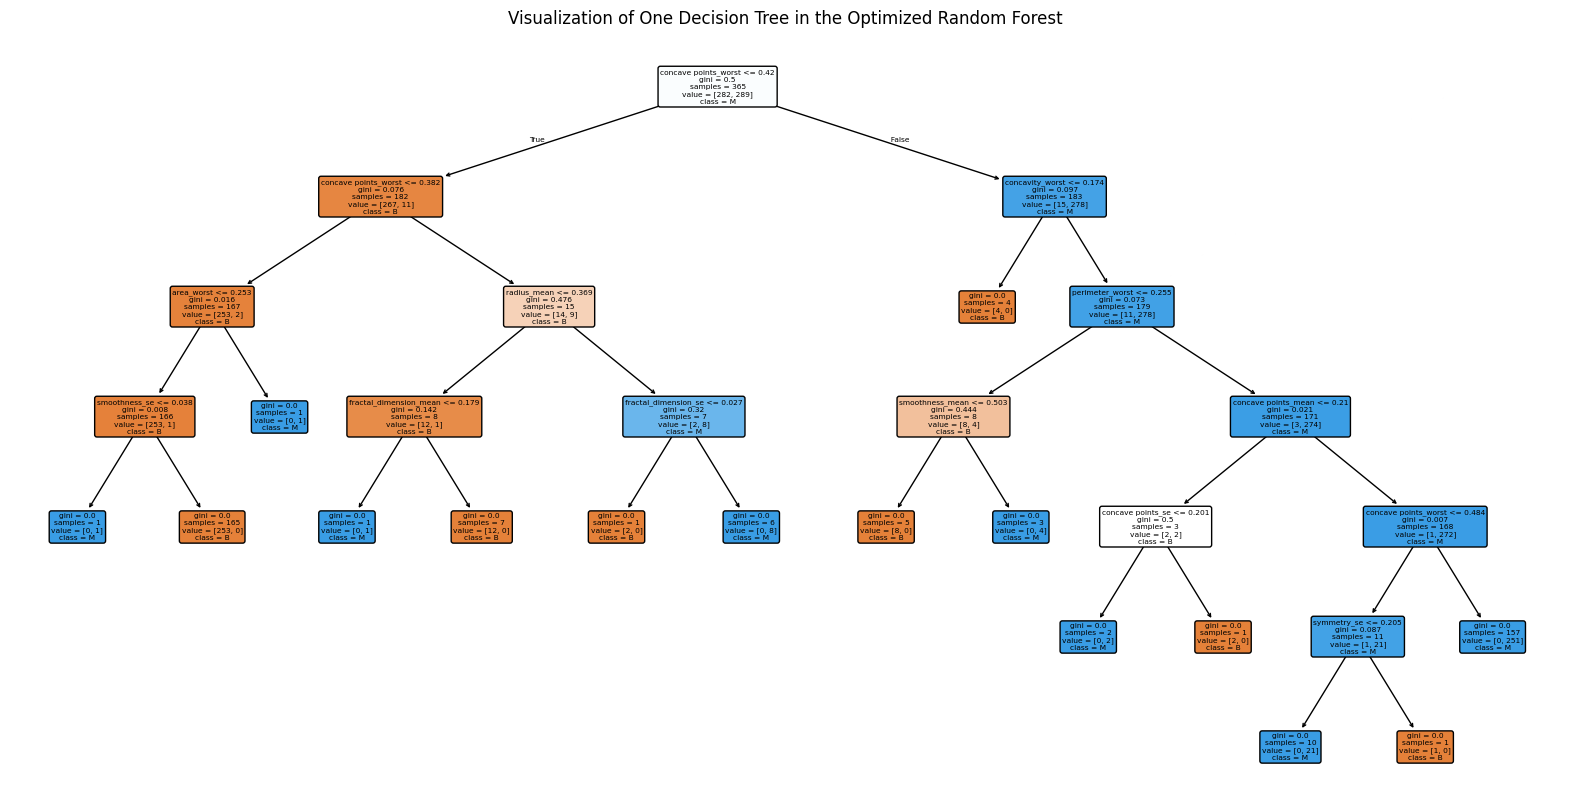

In [42]:
## Randomized search for ALL 4 parameters

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [1,20, 50, 100, 200, 300, 500],  # Number of trees in the forest
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(criterion='gini', random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
rf_random = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model on the training data
rf_random.fit(X_train, y_train)

# Get the best parameters
best_params = rf_random.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the best model with optimized hyperparameters
best_rf_clf = rf_random.best_estimator_

# Predict on the test set
y_pred = best_rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Hyper parameter tuning**


# **I am a little confused. It seems the models automatically creates a tree with the best stats from the beginning. I think though that it automatically graviatates to the same model over and over. Below is my model that I think is best, it has the same scores but WAY fewer leaves. I think THIS IS THE BEST model**


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_depth': 4}
Model Accuracy: 0.9580
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        69
           M       0.96      0.96      0.96        74

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



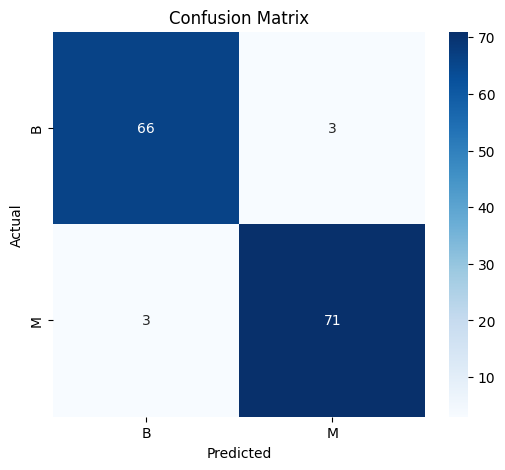

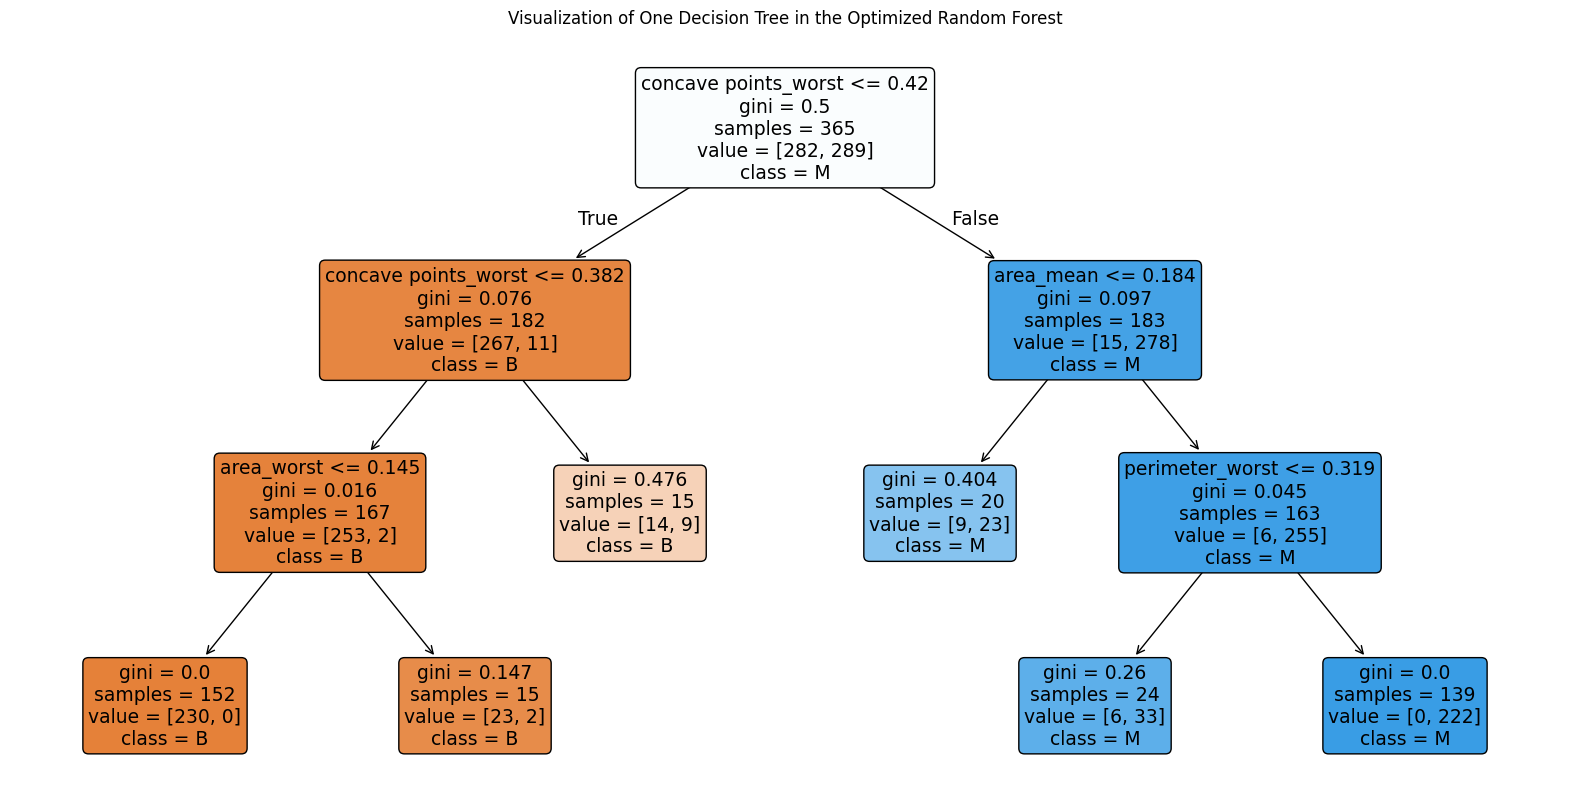

In [43]:
## Randomized search for ALL 4 parameters

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [300],  # Number of trees in the forest
    'max_depth': [3 ,4, ],  # Maximum depth of each tree
    'min_samples_split': [20, 30],  # Minimum number of samples required to split a node
    'min_samples_leaf': [15, 25 ]  # Minimum number of samples at a leaf node
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(criterion='gini', random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
rf_random = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model on the training data
rf_random.fit(X_train, y_train)

# Get the best parameters
best_params = rf_random.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the best model with optimized hyperparameters
best_rf_clf = rf_random.best_estimator_

# Predict oaccuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize one of the decision trees from the best Random Forest model
plt.figure(figsize=(20,10))
plot_tree(best_rf_clf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['B', 'M'], rounded=True)
plt.title("Visualization of One Decision Tree in the Optimized Random Forest")
plt.show()




# --- Principal Component Analysis ---

To understand and apply dimensionality reduction techniques using Python and the Breast Cancer Wisconsin dataset:

Apply **PCA** to the **scaled training data**.
1. Determine the number of principal components that explain **at least 80% of the variance**.
2. **Transform** both the training and testing data using the selected number of principal components.
3. **Visualize** the **first two principal components **using a scatter plot, color-coded by the target variable (malignant/benign).

Number of Principal Components explaining ≥ 80% variance: 5

Top Features Contributing to the 5 Principal Components:
                              PC1       PC2       PC3       PC4       PC5
radius_mean              0.220168 -0.228792 -0.023531 -0.034704 -0.040257
texture_mean             0.111709 -0.050388 -0.008382  0.605121  0.027643
perimeter_mean           0.229101 -0.210852 -0.021897 -0.035741 -0.041711
area_mean                0.221818 -0.230557  0.018216 -0.048944 -0.009695
smoothness_mean          0.152550  0.185950 -0.083603 -0.148160  0.376586
compactness_mean         0.237988  0.162721 -0.057684 -0.036960 -0.024491
concavity_mean           0.262128  0.054938  0.013442 -0.034017 -0.076821
concave points_mean      0.263310 -0.033396 -0.028511 -0.058361  0.044121
symmetry_mean            0.143056  0.190319 -0.046556 -0.066702  0.294124
fractal_dimension_mean   0.060760  0.359737  0.003807 -0.058191  0.028024
radius_se                0.207725 -0.136472  0.236451 -0.072964  0.1

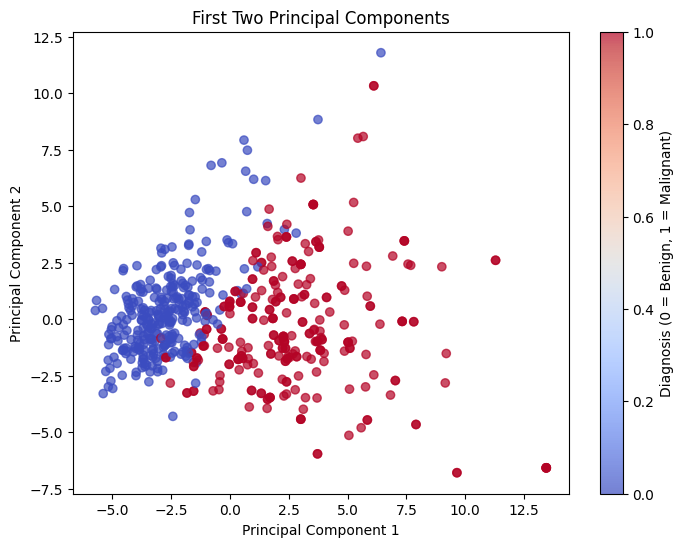

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Step 3: Find the number of components that explain ≥ 80% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Identify the first 5 components responsible for 80% variance
num_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Number of Principal Components explaining ≥ 80% variance: {num_components}")

# Step 4: Get variable contributions for these 5 components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Loadings (how much each feature contributes to these PCs)
pca_loadings = pd.DataFrame(pca.components_, columns=X_train.columns, index=[f'PC{i+1}' for i in range(num_components)])

# Display the top 5 components and their most important features
print("\nTop Features Contributing to the 5 Principal Components:")
top_features = pca_loadings.T  # Transpose to see features as rows
print(top_features)

# Step 5: Visualize the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train.map({'B': 0, 'M': 1}), cmap='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("First Two Principal Components")
plt.colorbar(label="Diagnosis (0 = Benign, 1 = Malignant)")
plt.show()


# **PCA analyis is very hard to visualize. But basically if you reduce the dimensions to just 5 theoretically math-mashed columns you can explain 80% of the characteristics of the original data. Considering the data originally had 30 columns this is great for reducing the coputation needed for future analyses.**